In [1]:
import thermofun as fun
import thermohubclient as client
import numpy as np

In [2]:
#dbc = client.DatabaseClient()
#dbc.saveDatabase('aq17')

In [3]:
batch = fun.ThermoBatch('aq17-thermofun.json')

In [27]:
batch.setPropertiesUnits(["temperature", "pressure"],["degC","bar"])
batch.setPropertiesDigits(["heat_capacity_cp","entropy", "volume", "temperature", "pressure", "logKr"], [4, 4, 4, 0, 2, 3])
substances = ["Na+", "Ca+2", "SiO2@", "CO3-2", 'OH-']
lables = ["Na$^{+}$", "Ca$^{2+}$", "SiO$_{2(aq)}$", "CO$_{3}^{2-}$", 'OH$^-$']
properties = ["heat_capacity_cp"]
batch.setPressureIncrement(0,0,0)
batch.setTemperatureIncrement(0,250, 10)

In [28]:
batch.thermoPropertiesSubstance(substances, properties).toCSV("results.csv")

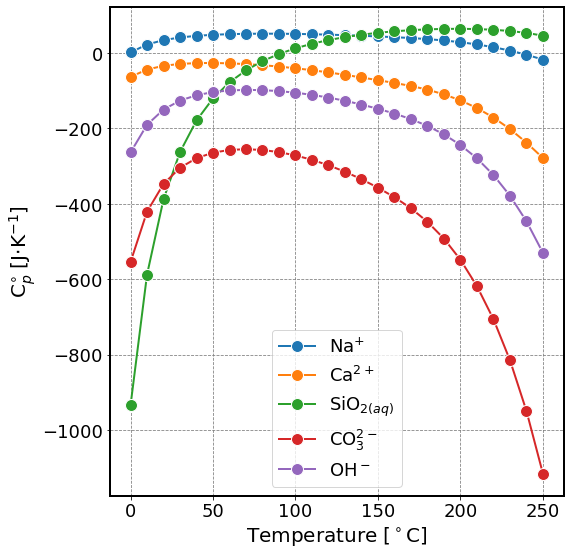

In [30]:
from functions import plot_substances_properties_vs_temperature
ax1 = plot_substances_properties_vs_temperature('results.csv', substances, lables, 0,  'C$_{p}^{\circ}$ [J$\cdot$K$^{-1}] $')
plt.savefig(fname='figure_Cp.png', format='png')

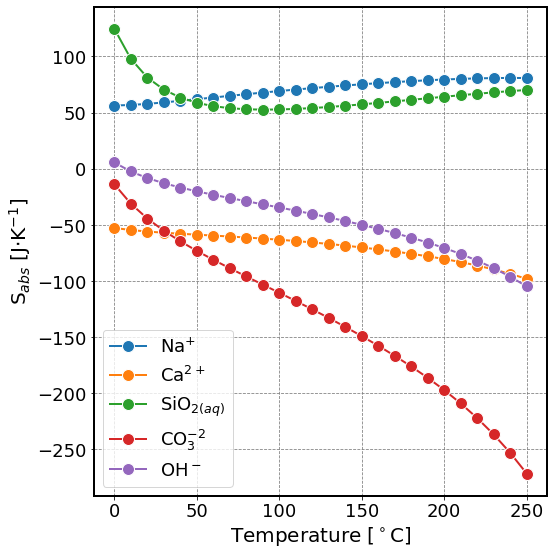

In [7]:
batch.thermoPropertiesSubstance(substances, ["entropy"]).toCSV("results_S.csv")
from functions import plot_substances_properties_vs_temperature
plt = plot_substances_properties_vs_temperature('results_S.csv', substances, lables, 0,  'S$_{abs}$ [J$\cdot$K$^{-1}] $')
plt.savefig(fname='figure_s.png')

In [20]:
reactions = ["Calcite = Ca+2 + CO3-2", "H2O@ = H+ + OH-", "NaCl@ = Na+ + Cl-", "Al+3 + H2O@ = AlOH+2 + H+"]
lables = ["Calcite $\leftrightharpoons$ Ca$^{2+}$ + CO$_{3}^{2-}$", "H$_2$O$_{(l)}$ $\leftrightharpoons$ H$^+$ + OH$^-$", "NaCl$_{(aq)}$ $\leftrightharpoons$ Na$^+$ + Cl$^-$", "Al$^{3+}$ + H$_2$O$_{(l)}$ $\leftrightharpoons$ AlOH$^{2+}$ + H$^+$"]

In [21]:
batch.thermoPropertiesReaction(reactions, ["logKr"]).toCSV("results_r.csv")

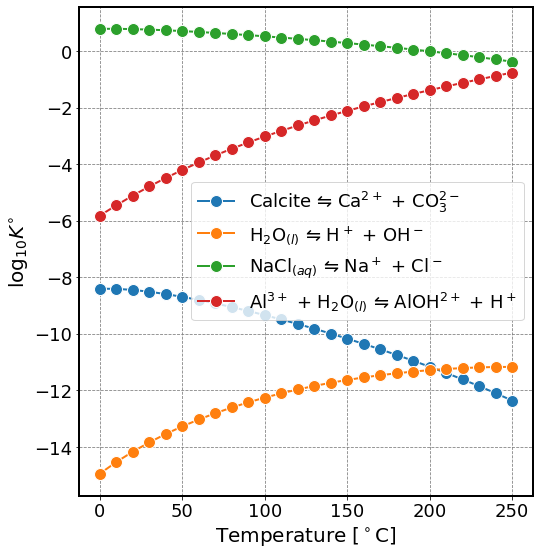

In [23]:
from functions import plot_substances_properties_vs_temperature
plt = plot_substances_properties_vs_temperature('results_r.csv', reactions, lables, 0,  'log$_{10}K^{\circ}$')
plt.savefig(fname='figure_logK.png', format='png')

In [11]:
engine = fun.ThermoEngine('aq17-thermofun.json')

In [12]:
T  = np.arange(273.15, 1000+273.15, 5)
P  = np.arange(50e5, 3000e5, 60e5)

In [13]:

Cordi1 = [[engine.propertiesSolvent(t, p ,"H2O@").density.val for t in T] for p in P]

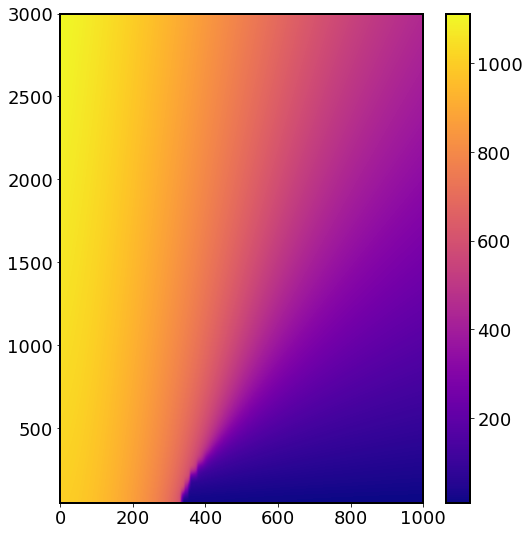

In [14]:

plt.imshow(Cordi1, interpolation='quadric', origin='lower', aspect='auto', cmap='plasma', extent=[0,1000,50,3000])
plt.colorbar()

In [15]:
eps = [[engine.electroPropertiesSolvent(t, p ,"H2O@").epsilon.val for t in T] for p in P]

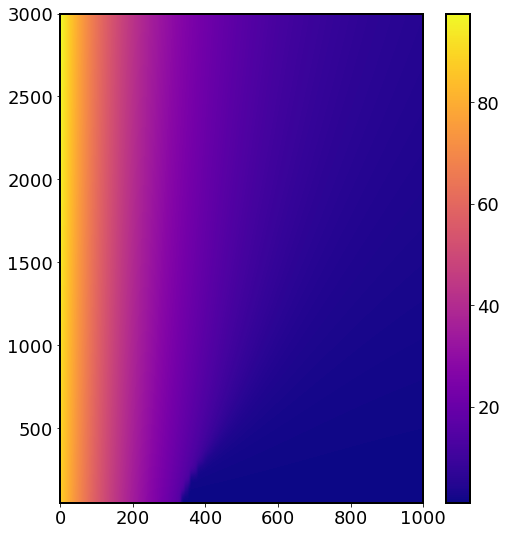

In [16]:

plt.imshow(eps, interpolation='quadric', origin='lower', aspect='auto', cmap='plasma', extent=[0,1000,50,3000])
plt.colorbar()